In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [ ]:
# Detailed Information on Missing Data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(20)

In [ ]:
# Drop the fields having > 40% missing values to avoid bias in the model
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['PoolQC'],axis=1,inplace=True)
df.drop(['MiscFeature'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)

# Impute continuous var with Mean; Impute categorical var with Mode
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
# Convert categorical features into continuous features in Train Data
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [ ]:
# Feature Selection using Random Forest 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

x_t = df.drop('SalePrice', axis=1)
y_t = df['SalePrice']
#clf = SelectFromModel(RandomForestClassifier(n_estimators=100, max_features='log2', max_depth = 4))
#clf = SelectFromModel(DecisionTreeClassifier(max_features='log2'))
clf = SelectFromModel(GradientBoostingClassifier(n_estimators=100, loss='deviance'))
clf.fit(x_t, y_t)
sel_feat= x_t.columns[(clf.get_support())]
print(sel_feat)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


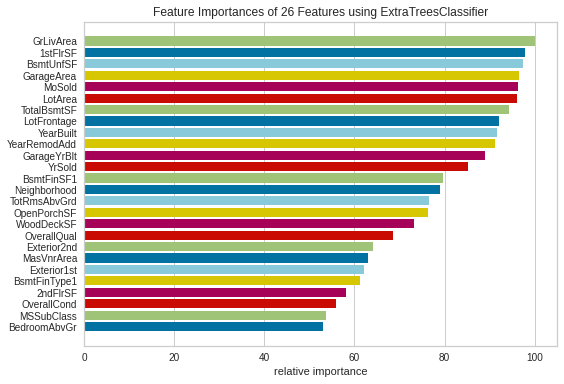

In [42]:
# Visualize Relative Feature Importance
from yellowbrick.features import FeatureImportances
from sklearn.ensemble import ExtraTreesClassifier
#clf = RandomForestClassifier(n_estimators=100)
clf = ExtraTreesClassifier()
x_train = df[['MSSubClass','LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']] #kept all selected features except 'Id'
y_train = df['SalePrice']
viz = FeatureImportances(clf)
viz.fit(x_train, y_train)
viz = FeatureImportances(clf)
viz.fit(x_train, y_train)
viz.poof()

In [ ]:
df_train = df[['Id','MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']] 
# Included 'Id' and 'SalePrice' to complete the working feature set for training 

In [ ]:
# Check correlation matrix for the selected features
import numpy as np
import matplotlib.pyplot as plt
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), mask = mask, vmin = -1, annot = True, cmap = 'PuBu')

High correlation has been observed for the following pair of features:
* 'Exterior1st' and 'Exterior2nd'
* 'TotalBsmtSF' and '1stFlrSF'
* 'GrLivArea' and 'TotRmsAbvGrd'
* 'OverallQual' and 'SalePrice'
* 'GarageYrBlt' and 'YearBuilt'

In [ ]:
# Checking skewness of the selected features. If highly skewed, we should either discard or transform it.
skewness_of_features=[]
for col in df_train:
        skewness_of_features.append(df_train[col].skew())
print(skewness_of_features)

'LotArea' is highly skewed having skewness of > 12. But discarding it altogether would be tricky. Earlier, while plotting Feature Importance, we observed that 'LotArea' has the highest importance. 

In [ ]:
# Checking if log-transformation can reduce its skewness
df_train['LotArea']=np.log(df_train['LotArea'])
df_train['LotArea'].skew()

In [ ]:
import numpy as np
x_train = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']] 

In [ ]:
y_train = df_train['SalePrice']

In [ ]:
import xgboost as xgb
from hyperopt import hp, tpe, fmin
from sklearn.model_selection import cross_val_score

space = {'n_estimators':hp.quniform('n_estimators', 1500, 2500, 25),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'base_score':hp.uniform('base_score',0.6,0.9),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.03),
         'max_depth':hp.quniform('max_depth', 3,8,1),
         'subsample':hp.uniform('subsample', 0.50, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.50, 0.95),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.50, 0.95),
         'colsample_bynode':hp.uniform('colsample_bynode', 0.50, 0.95),
         'reg_lambda':hp.uniform('reg_lambda', 1, 20)
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'base_score': params['base_score'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'colsample_bynode': params['colsample_bynode'],  
             'reg_lambda': params['reg_lambda']}
    
    xb_a= xgb.XGBRegressor(**params)
    score = cross_val_score(xb_a, x_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

best = fmin(fn= objective, space= space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest)

In [ ]:
print(best)

In [ ]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

total = df_test[['MSSubClass', 'LotFrontage', 'LotArea','Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']].isnull().sum().sort_values(ascending=False)

# Missing Value analysis for Test Data
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test.head(12)

In [ ]:
# Missing Value imputation for Test Data
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean()) 
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())

In [ ]:
df_test['LotArea']=np.log(df_test['LotArea'])

In [ ]:
# One-Hot encoding to convert categ. vars to Numeric vars for Test Data
from sklearn.preprocessing import LabelEncoder
df_test_work = df_test[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']]

lencoders_test = {}
for colt in df_test_work.select_dtypes(include=['object']).columns:
    lencoders_test[colt] = LabelEncoder()
    df_test_work[colt] = lencoders_test[colt].fit_transform(df_test_work[colt])

In [ ]:
# Prediction using XGB model having the best set of hyperparameters
import pandas as pd_out
import xgboost 
from sklearn.model_selection import train_test_split
import numpy as np
reg_final = xgboost.XGBRegressor(base_score=best['base_score'], 
            colsample_bylevel=best['colsample_bylevel'], colsample_bynode=best['colsample_bynode'], 
            colsample_bytree=best['colsample_bytree'], #eval_metric='rmse', 
            gamma=best['gamma'], learning_rate=best['learning_rate'],
            max_depth=int(best['max_depth']), n_estimators=int(best['n_estimators']), 
            #n_jobs=0,num_parallel_tree=1, objective='reg:squarederror', 
            random_state=123, reg_lambda=best['reg_lambda'], subsample=best['subsample'])
#X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=123)
#reg_final.fit(X_train,Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False)
reg_final.fit(x_train,y_train)
y_pred = reg_final.predict(df_test_work)
prediction = pd_out.DataFrame(y_pred)
output = pd_out.concat([df_test_work['Id'],prediction], axis=1)
output.columns=['Id','SalePrice']
output.to_csv('HousePrice_submission.csv', index=False)
print("Submission successful")